In [3]:
# pip install fbprophet

## Facebook's Prophet Library

In [4]:
import pandas as pd
from prophet import Prophet

#### Load the Data

In [5]:
df = pd.read_csv("./UDEMY_TSA_FINAL/Data/BeerWineLiquor.csv")
# Do some formatting
df.columns = ["ds", "y"]
df["ds"] = pd.to_datetime(df["ds"])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


#### 'ds' must be a datetime object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


#### Create and Fit Model

In [7]:
# Fitting on all the data (no training and testing set for this example) 
m = Prophet()
m.fit(df)

13:43:33 - cmdstanpy - INFO - Chain [1] start processing
13:43:33 - cmdstanpy - INFO - Chain [1] done processing


### 1. Forecasting
Create a "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [8]:
future = m.make_future_dataframe(periods = 24, freq = "MS")

In [9]:
len(df)

324

In [10]:
len(future)

348

### 2. Predict and fill in the Future

In [11]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5200.713315,5074.614752,5396.676019,5188.319639,5212.019885,40.246355,40.246355,40.246355,40.246355,40.246355,40.246355,0.0,0.0,0.0,5240.959670
344,2020-09-01,5216.783409,4926.738728,5245.106323,5203.428330,5229.341043,-132.916603,-132.916603,-132.916603,-132.916603,-132.916603,-132.916603,0.0,0.0,0.0,5083.866806
345,2020-10-01,5232.335113,5041.082908,5350.281332,5218.228803,5245.933216,-43.289567,-43.289567,-43.289567,-43.289567,-43.289567,-43.289567,0.0,0.0,0.0,5189.045546
346,2020-11-01,5248.405207,5169.371171,5495.258310,5233.082801,5263.186254,86.826365,86.826365,86.826365,86.826365,86.826365,86.826365,0.0,0.0,0.0,5335.231572
347,2020-12-01,5263.956911,6183.918366,6494.846467,5247.764910,5279.665205,1071.399576,1071.399576,1071.399576,1071.399576,1071.399576,1071.399576,0.0,0.0,0.0,6335.356487


In [12]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4628.441552,4455.560270,4785.767263
337,2020-02-01,4678.807340,4531.727293,4849.034220
338,2020-03-01,4942.197241,4788.485832,5101.930280
339,2020-04-01,4941.221054,4783.507523,5108.480322
340,2020-05-01,5198.169330,5034.699322,5355.160538
341,2020-06-01,5179.161700,5009.585284,5340.201154
342,2020-07-01,5311.678492,5150.462243,5477.318466
343,2020-08-01,5240.959670,5074.614752,5396.676019
344,2020-09-01,5083.866806,4926.738728,5245.106323
345,2020-10-01,5189.045546,5041.082908,5350.281332


#### Plotting Forecast
We can use Prophet's own built in plotting tools

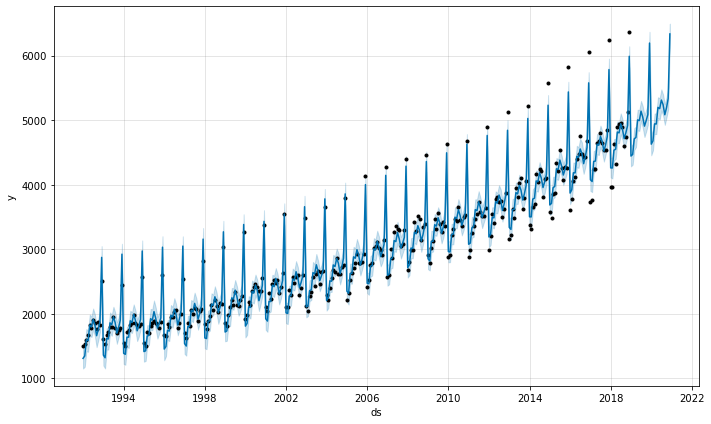

In [14]:
m.plot(forecast);

#### Zoom

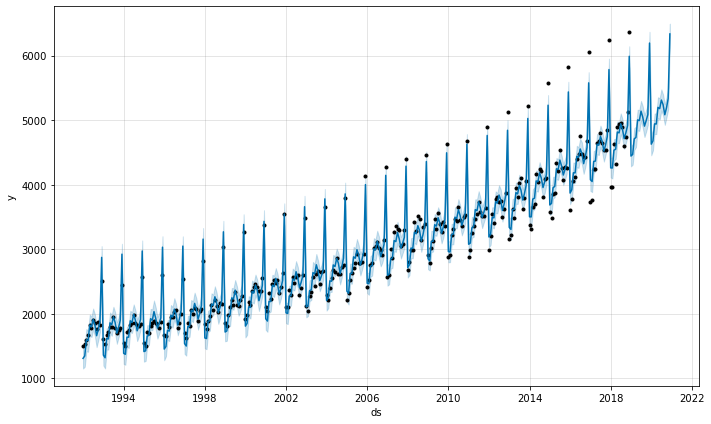

In [15]:
import matplotlib.pyplot as plt
m.plot(forecast);
# plt.xlim('2014-01-01','2022-01-01')

#### Plotting the forecasted values

<AxesSubplot:xlabel='ds'>

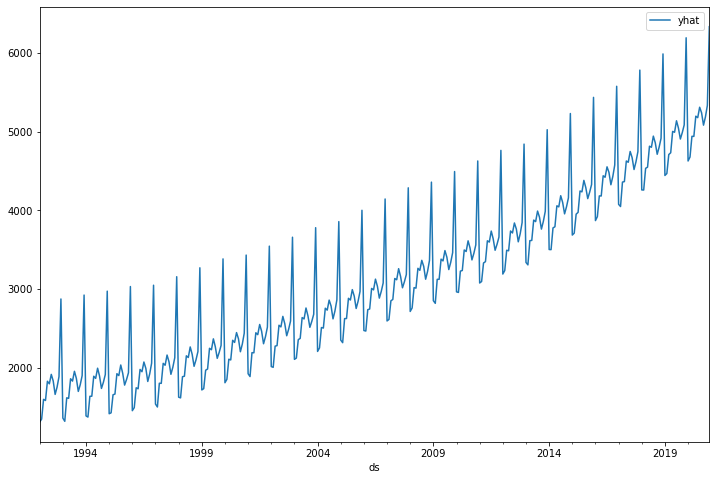

In [16]:
forecast.plot(x='ds',y='yhat', figsize = (12,8))

#### Breakdown of Trend and Yearly Components

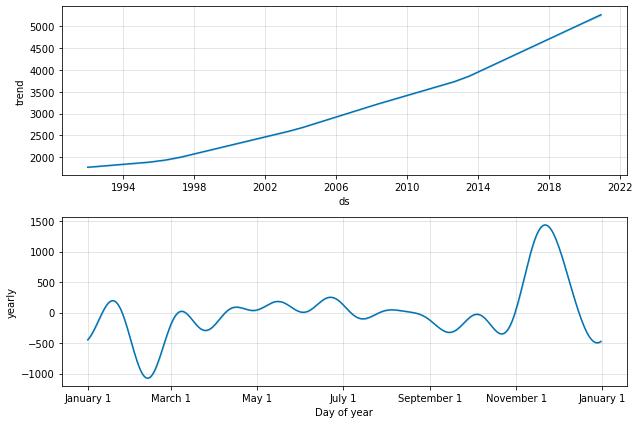

In [17]:
m.plot_components(forecast);

### Facebook's Prophet Library

In [18]:
df = pd.read_csv("./UDEMY_TSA_FINAL/Data/Miles_Traveled.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [19]:
df.columns = ["ds", "y"]
df["ds"] = pd.to_datetime(df["ds"])
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


#### Plot the actual data

<AxesSubplot:xlabel='ds'>

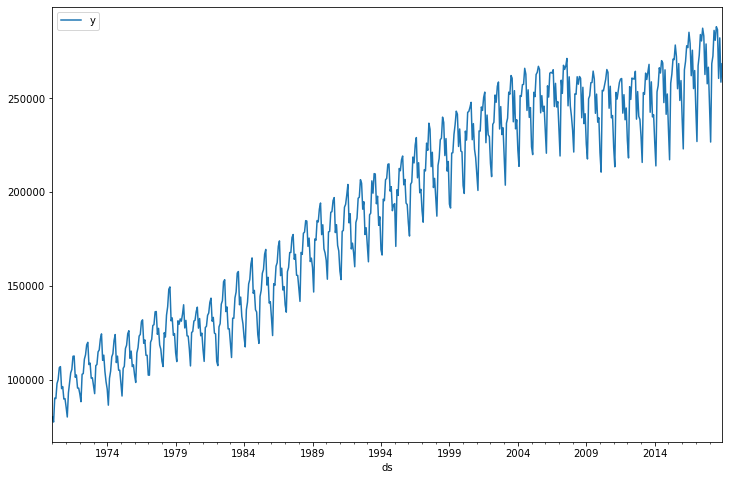

In [20]:
df.plot(x = "ds", y = "y", figsize = (12, 8))

In [21]:
len(df)

588

In [22]:
train = df.iloc[:564]
test = df.iloc[564:] # Test Set is 24 Months

In [23]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods = 24, freq = "MS")
forecast = m.predict(future)

13:43:36 - cmdstanpy - INFO - Chain [1] start processing
13:43:36 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,257957.454511,269061.200251,280028.679104,257529.695880,258408.884253,16546.521950,16546.521950,16546.521950,16546.521950,16546.521950,16546.521950,0.0,0.0,0.0,274503.976460
584,2018-09-01,258032.665399,250898.973477,262072.414287,257561.660852,258537.390336,-1512.851826,-1512.851826,-1512.851826,-1512.851826,-1512.851826,-1512.851826,0.0,0.0,0.0,256519.813573
585,2018-10-01,258105.450130,258033.393599,269064.093268,257584.271199,258666.652380,5321.627860,5321.627860,5321.627860,5321.627860,5321.627860,5321.627860,0.0,0.0,0.0,263427.077990
586,2018-11-01,258180.661019,244437.748405,255923.330732,257618.284033,258804.419549,-8046.931243,-8046.931243,-8046.931243,-8046.931243,-8046.931243,-8046.931243,0.0,0.0,0.0,250133.729776
587,2018-12-01,258253.445749,245088.513840,257304.757937,257635.767085,258928.602198,-6877.501935,-6877.501935,-6877.501935,-6877.501935,-6877.501935,-6877.501935,0.0,0.0,0.0,251375.943814


<AxesSubplot:xlabel='ds'>

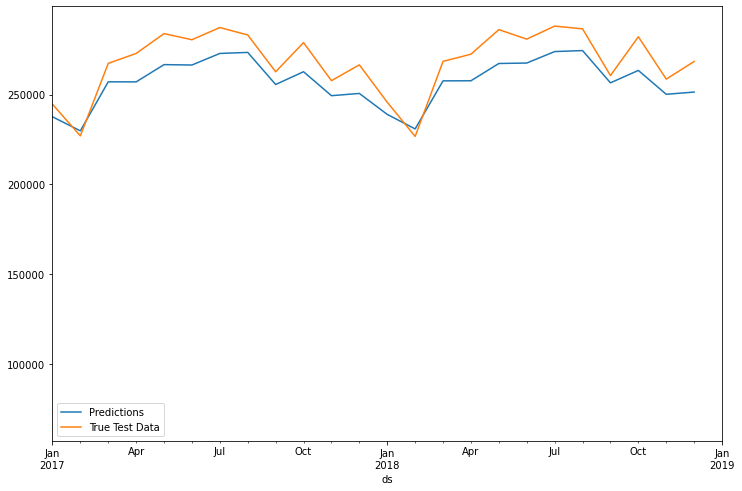

In [25]:
ax = forecast.plot(x = "ds", 
                   y = "yhat", 
                   label = "Predictions",
                  legend = True, 
                   figsize = (12,8))
test.plot(x = "ds", 
          y = "y", 
          label = "True Test Data", 
          legend = True, 
          ax = ax,
         xlim = ('2017-01-01', '2019-01-01'))

#### Evaluation

In [26]:
from statsmodels.tools.eval_measures import rmse

In [27]:
predictions = forecast.iloc[-24:]['yhat']
predictions

564    237588.979961
565    229751.607861
566    257083.761589
567    257040.373003
568    266671.284086
569    266447.647160
570    272896.834946
571    273470.864466
572    255592.457995
573    262698.709357
574    249351.448979
575    250600.367195
576    238917.305141
577    230829.405046
578    257627.634271
579    257661.737935
580    267296.771866
581    267540.808304
582    273939.142264
583    274503.976460
584    256519.813573
585    263427.077990
586    250133.729776
587    251375.943814
Name: yhat, dtype: float64

In [28]:
test['y']

564    244587.0
565    226947.0
566    267355.0
567    272904.0
568    283956.0
569    280537.0
570    287343.0
571    283184.0
572    262673.0
573    278937.0
574    257712.0
575    266535.0
576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [29]:
rmse(predictions, test['y'])

12689.26436697407

In [30]:
test['y'].mean()

268231.0833333333

### Prophet's Diagnostics - CrossValidation

In [31]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [32]:
# INITIAL
initial = 5 * 365 #No. of Dasy in 5 Years
initial = str(initial) + ' days'

# PERIOD
period = 5 * 365
period = str(period) + ' days'

# HORIZON
horizon = 365
horizon = str(horizon) + ' days' #No. of days we want to forecast into the future

#### Perform the Crossvalidation

In [33]:
df_cv = cross_validation(m, 
                         initial = initial, 
                         period = period,
                        horizon = horizon)

  0%|          | 0/9 [00:00<?, ?it/s]

13:43:38 - cmdstanpy - INFO - Chain [1] start processing
13:43:38 - cmdstanpy - INFO - Chain [1] done processing
13:43:39 - cmdstanpy - INFO - Chain [1] start processing
13:43:39 - cmdstanpy - INFO - Chain [1] done processing
13:43:39 - cmdstanpy - INFO - Chain [1] start processing
13:43:39 - cmdstanpy - INFO - Chain [1] done processing
13:43:39 - cmdstanpy - INFO - Chain [1] start processing
13:43:39 - cmdstanpy - INFO - Chain [1] done processing
13:43:40 - cmdstanpy - INFO - Chain [1] start processing
13:43:40 - cmdstanpy - INFO - Chain [1] done processing
13:43:40 - cmdstanpy - INFO - Chain [1] start processing
13:43:40 - cmdstanpy - INFO - Chain [1] done processing
13:43:40 - cmdstanpy - INFO - Chain [1] start processing
13:43:40 - cmdstanpy - INFO - Chain [1] done processing
13:43:41 - cmdstanpy - INFO - Chain [1] start processing
13:43:41 - cmdstanpy - INFO - Chain [1] done processing
13:43:41 - cmdstanpy - INFO - Chain [1] start processing
13:43:41 - cmdstanpy - INFO - Chain [1]

In [34]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1976-01-01,102282.768660,100948.207552,103696.732445,102460.0,1975-12-12
1,1976-02-01,96811.163190,95356.237917,98262.372672,98528.0,1975-12-12
2,1976-03-01,112360.500335,110963.171299,113848.955515,114284.0,1975-12-12
3,1976-04-01,112029.050389,110552.551044,113393.976664,117014.0,1975-12-12
4,1976-05-01,119162.031674,117690.817383,120552.106708,123278.0,1975-12-12


In [35]:
len(df_cv)

108

#### Performance Metrics for each Horizon Periods

In [36]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,51 days,3.997933e+07,6322.920827,5201.847047,0.029560,0.025821,0.029127,0.4
1,53 days,4.004738e+07,6328.299922,5268.499982,0.030155,0.025821,0.029726,0.4
2,54 days,4.542005e+07,6739.440103,5724.373751,0.033657,0.025821,0.032967,0.4
3,55 days,5.620595e+07,7497.062802,6493.983458,0.038361,0.030560,0.037456,0.3
4,56 days,4.574376e+07,6763.413346,5914.473889,0.034280,0.030560,0.033591,0.3
...,...,...,...,...,...,...,...,...
94,360 days,3.091848e+07,5560.439126,4387.392581,0.023633,0.023713,0.023651,0.4
95,361 days,3.082854e+07,5552.345405,4309.921993,0.023232,0.023713,0.023252,0.4
96,362 days,3.116898e+07,5582.918893,4395.388203,0.023528,0.023713,0.023541,0.4
97,363 days,2.912772e+07,5397.010643,4001.197615,0.021922,0.019293,0.021952,0.5


#### Plot the MAPE

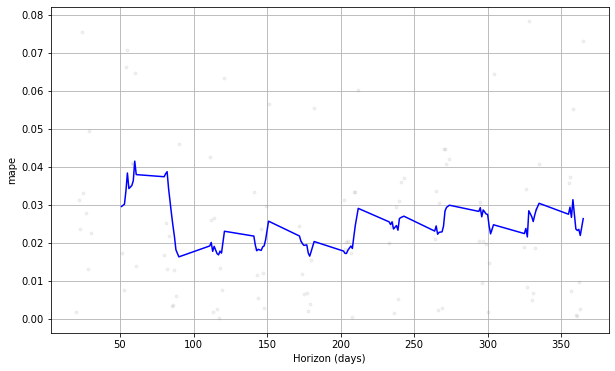

In [39]:
plot_cross_validation_metric(df_cv, metric = 'mape');

#### Plot the RMSE

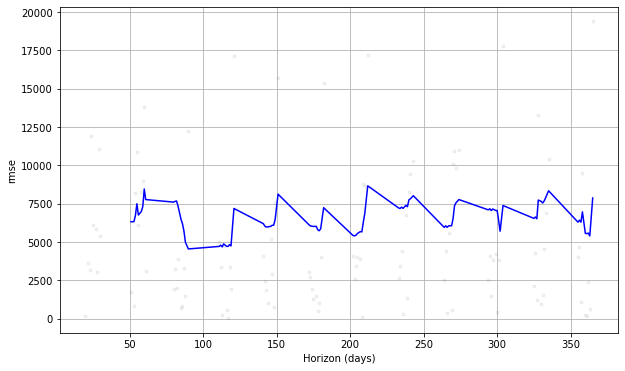

In [38]:
plot_cross_validation_metric(df_cv, metric = 'rmse');

### Facebook Prophet - Trend

In [40]:
df = pd.read_csv("./UDEMY_TSA_FINAL/Data/HospitalityEmployees.csv")

In [41]:
df.columns

Index(['Date', 'Employees'], dtype='object')

In [43]:
df.columns = ['ds', 'y'] #Rename the columns
df['ds'] = pd.to_datetime(df['ds'])

#### Plot the Hospitality Employees Data

<AxesSubplot:xlabel='ds'>

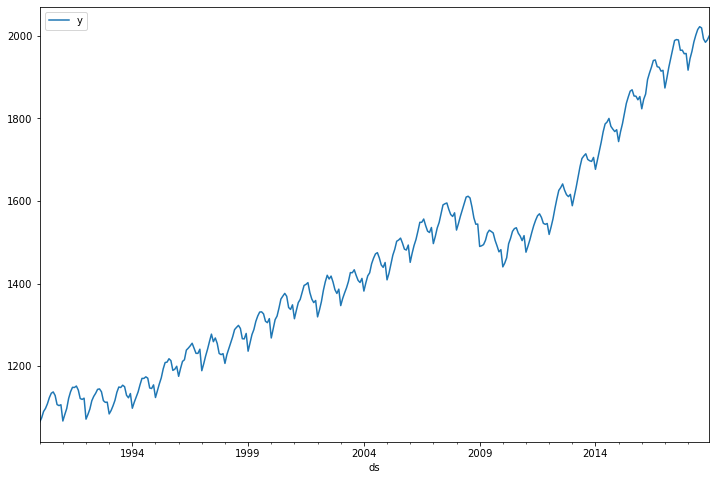

In [45]:
df.plot(x = 'ds', y = 'y', figsize = (12, 8))

In [46]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods = 12, freq = "MS")
forecast = m.predict(future)

13:55:48 - cmdstanpy - INFO - Chain [1] start processing
13:55:48 - cmdstanpy - INFO - Chain [1] done processing


#### When did the Trend Changes?

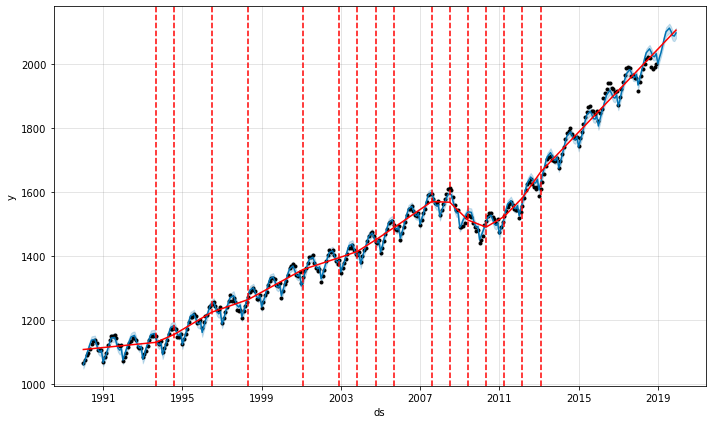

In [49]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Facebook's Prophet - Seasonality

In [50]:
df = pd.read_csv('./UDEMY_TSA_FINAL/Data/airline_passengers.csv')

In [51]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [52]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

#### Assuming Additive Seasonality

14:08:03 - cmdstanpy - INFO - Chain [1] start processing
14:08:03 - cmdstanpy - INFO - Chain [1] done processing


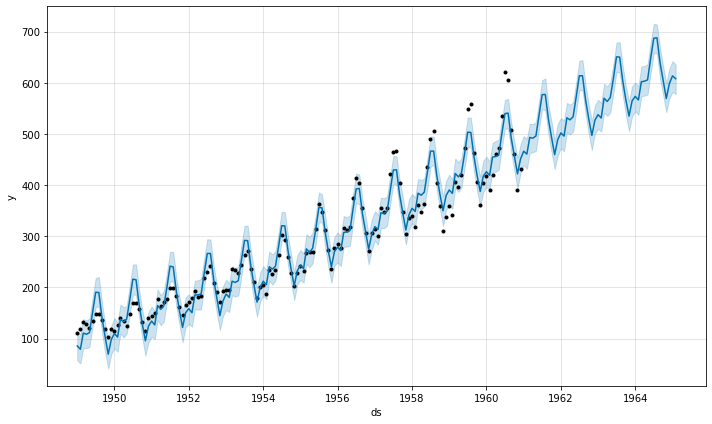

In [60]:
m = Prophet(seasonality_mode = 'additive')
m.fit(df)
future = m.make_future_dataframe(50, freq = "MS")
forecast = m.predict(future)
fig = m.plot(forecast)

#### The seasonality grows with the trend. Variance is also increasing over time

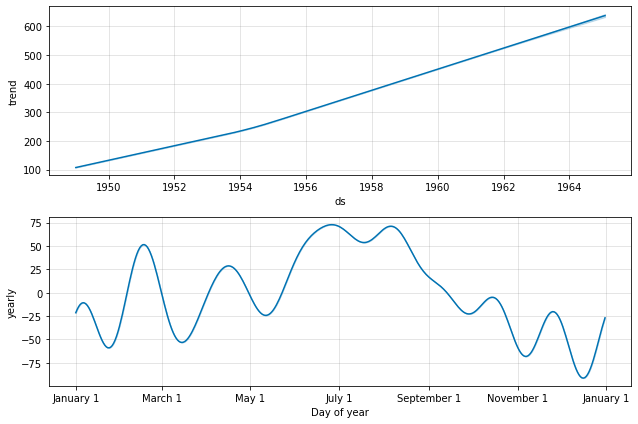

In [55]:
fig = m.plot_components(forecast);

In [56]:
from prophet.plot import add_changepoints_to_plot

#### Highlight the changes points

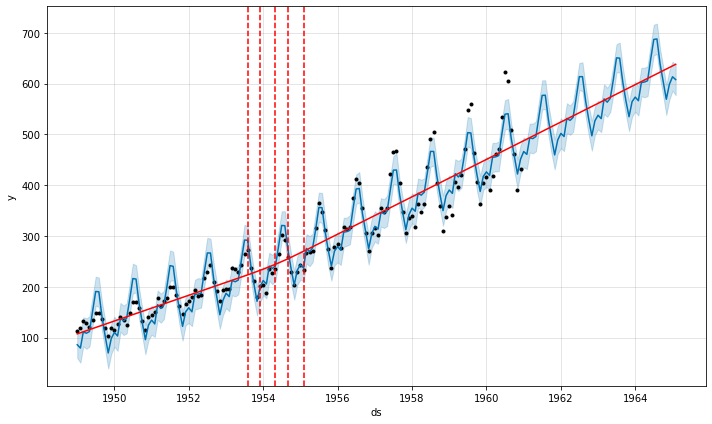

In [59]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

#### Change our Seasonality Mode to Multiplicative

14:08:30 - cmdstanpy - INFO - Chain [1] start processing
14:08:30 - cmdstanpy - INFO - Chain [1] done processing


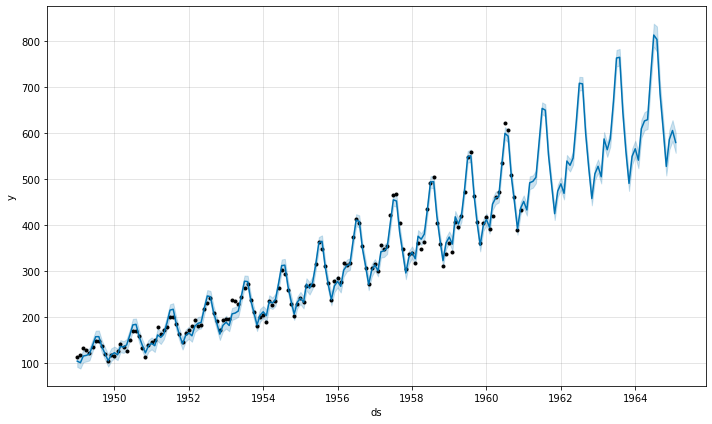

In [61]:
m = Prophet(seasonality_mode= 'multiplicative')
m.fit(df)
future = m.make_future_dataframe(50, freq = "MS")
forecast = m.predict(future)
fig = m.plot(forecast)

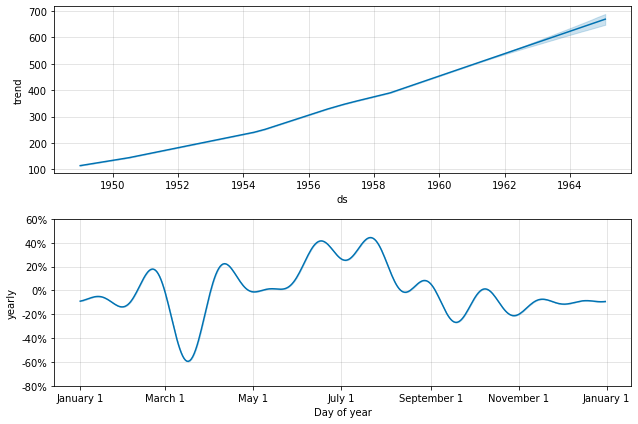

In [63]:
fig = m.plot_components(forecast);